# Decision Tree Exploration
### Decision trees are **interpretable**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names

variety_to_exclude = 0   # We need to explude one of the three varieties

# Keep only two classes
X = X[y != variety_to_exclude]
y = y[y != variety_to_exclude]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

Raw Data - Train accuracy: 1.0
Raw Data - Test accuracy: 0.7666666666666667


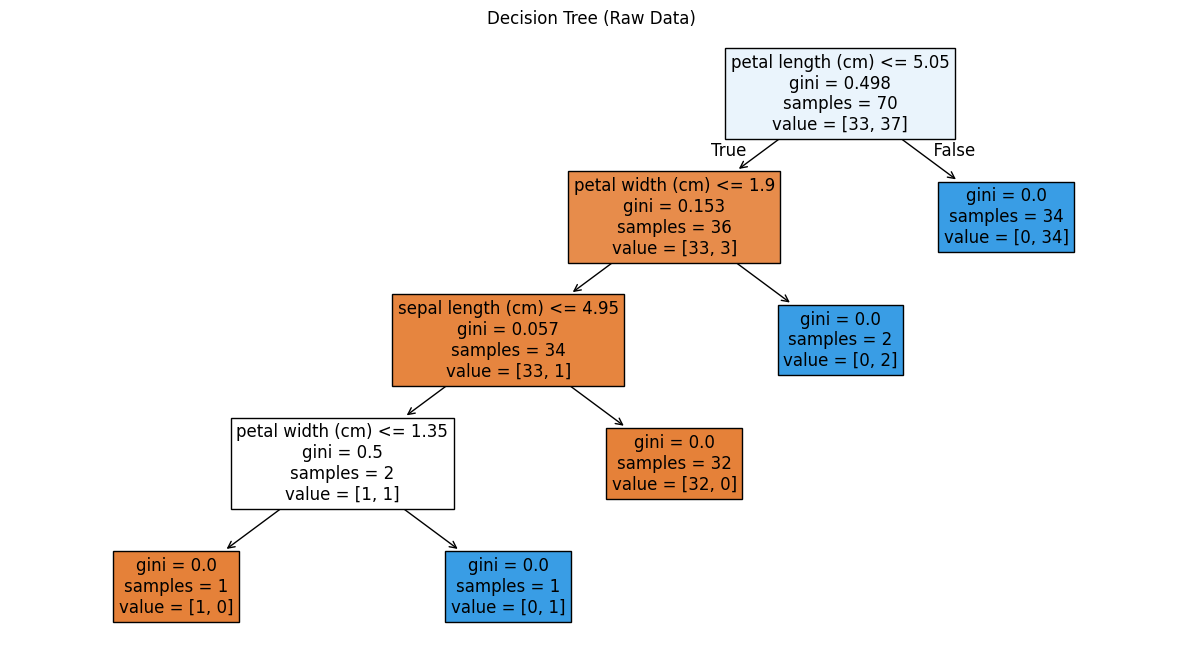

In [32]:
# Train our model
dt_raw = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_raw.fit(X_train, y_train)

print("Raw Data - Train accuracy:", dt_raw.score(X_train, y_train))
print("Raw Data - Test accuracy:", dt_raw.score(X_test, y_test))

# Let's see how it looks like
plt.figure(figsize=(15, 8))
plot_tree(dt_raw, feature_names=feature_names, fontsize=12, filled=True)
plt.title("Decision Tree (Raw Data)")
plt.show()

#  Standarization
## Let's standarize the features

Scaled Data - Train accuracy: 1.0
Scaled Data - Test accuracy: 0.7666666666666667


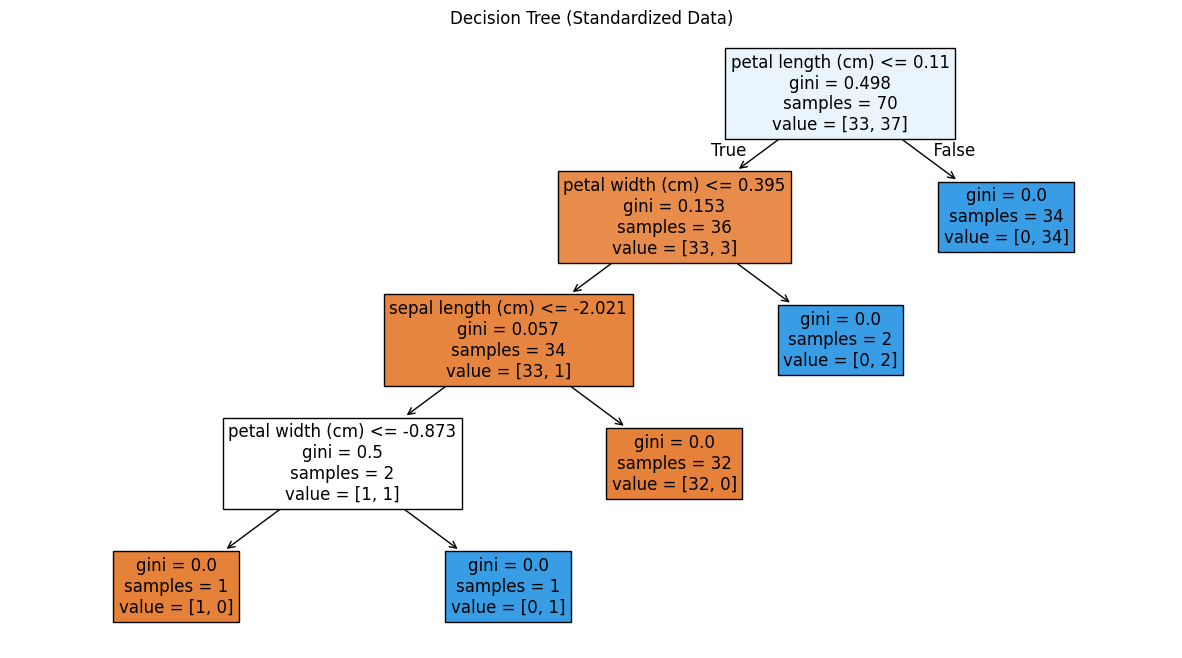

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_scaled = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_scaled.fit(X_train_scaled, y_train)

print("Scaled Data - Train accuracy:", dt_scaled.score(X_train_scaled, y_train))
print("Scaled Data - Test accuracy:", dt_scaled.score(X_test_scaled, y_test))

# Let's see how it looks like
plt.figure(figsize=(15, 8))
plot_tree(dt_scaled, feature_names=feature_names, fontsize=12, filled=True)
plt.title("Decision Tree (Standardized Data)")
plt.show()

## Ops! Do you note something strange?
### While we keep the feature names, the values does not represent a unit as before.
### We cannot have a sepal lenght of -2.021 cm!

In general, decision trees based algos (Decision Tree, Random Forest, Xgboost, etc) don't require to scale to perform the same.

# ToThink

Can a decision tree overfit even if it looks "interpretable"? How would you detect this?



# ToDo

Try changing max_depth and see how it affects explanations!

Change the problem (exclude a different variaty), and see how the model change.